#Handwriting Recognition using Convolutional Neural Network
* In order to achive this task, i have used the concept of neural networks. CNN is generally used for Image classification.

##CNN Architecture :-
1. Input layer: Image data is processed through this layer.
2. Convolutional layer: This layer is responsible for  extracting hierarchical features from input images.
3. Max pooling layer: It is responsible for the reduction of input images.
4. Fully Connected layer : It performs classification based on the features extracted by the convolutional layers.
5. Output layer : It predicts the probability distribution over the classes.

In [ ]:
import numpy as np
import tensorflow as tf
from tensorflow.keras import layers, models
from tensorflow.keras.preprocessing.image import ImageDataGenerator

##Dataset :-

MNIST (Modified National Institute of Standards and Technology) dataset is a collection of handwritten digits.

Size : The MNIST dataset contains 60,000 training images and 10,000 testing images.





In [ ]:
mnist=tf.keras.datasets.mnist
(train_image, train_label), (test_image, test_label) = mnist.load_data()

In [ ]:
train_image=train_image.reshape((train_image.shape[0], 28, 28, 1)).astype('float32') / 255
test_image=test_image.reshape((test_image.shape[0], 28, 28, 1)).astype('float32') / 255

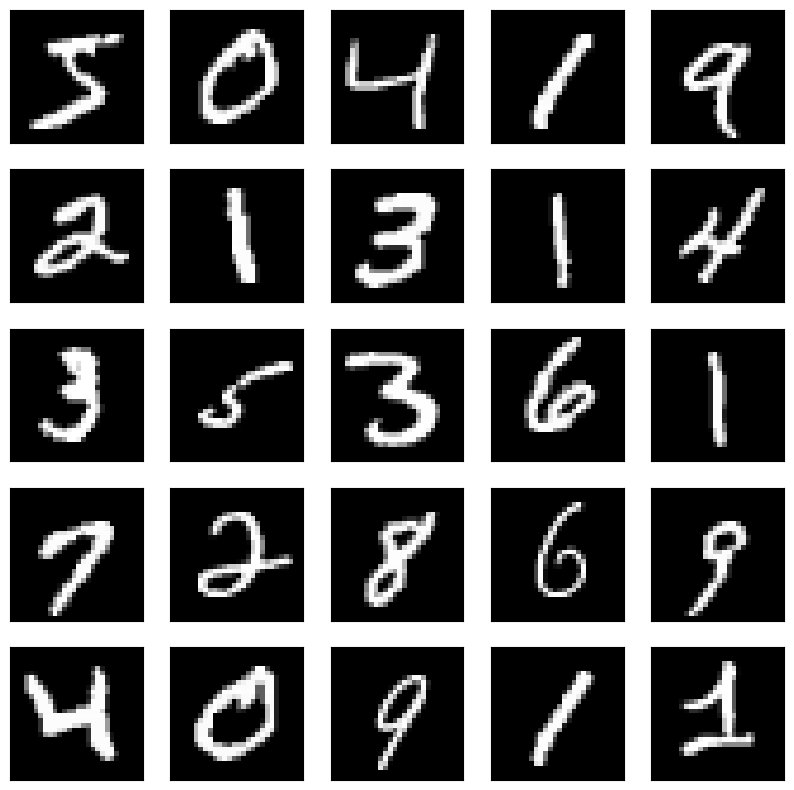

In [ ]:
# Visualize some samples from the MNIST dataset
import matplotlib.pyplot as plt
plt.figure(figsize=(10, 10))
for i in range(25):
    plt.subplot(5, 5, i+1)
    plt.imshow(train_image[i].reshape(28, 28), cmap='gray')
    plt.xticks([])
    plt.yticks([])
plt.show()

**Categorical cross-entropy :** loss function used for multi-class classification problems. It measures the difference between the true class labels and the predicted probabilities for each class.

**Adam** is a optimization algorithm used for training neural networks

In [ ]:
model=models.Sequential([
    layers.Conv2D(32, (3,3), activation="relu", input_shape=(28,28,1)),
    layers.MaxPooling2D((2,2)),
    layers.Conv2D(64, (3,3), activation="relu"),
    layers.MaxPooling2D((2,2)),
    layers.Conv2D(64, (3,3), activation="relu"),

    #Dense layer
    layers.Flatten(),
    layers.Dense(64, activation="relu"),
    layers.Dense(10, activation="softmax"),  #Output layer having 10 classes for 0-9 digits
])

#compile the model
model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

model.summary()


Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_3 (Conv2D)           (None, 26, 26, 32)        320       
                                                                 
 max_pooling2d_2 (MaxPoolin  (None, 13, 13, 32)        0         
 g2D)                                                            
                                                                 
 conv2d_4 (Conv2D)           (None, 11, 11, 64)        18496     
                                                                 
 max_pooling2d_3 (MaxPoolin  (None, 5, 5, 64)          0         
 g2D)                                                            
                                                                 
 conv2d_5 (Conv2D)           (None, 3, 3, 64)          36928     
                                                                 
 flatten_1 (Flatten)         (None, 576)              

**ImageDataGenerator** is a class provided by TensorFlow/Keras for real-time data augmentation during training.

The **flow()** method can be called to generate batches of augmented data during model training.

The train_image and train_label datasets are passed to **train_datagen.flow()** to generate augmented batches of training data during training.



In [ ]:
# Data Augmentation
train_datagen = ImageDataGenerator(
    rotation_range=10,
    width_shift_range=0.1,
    height_shift_range=0.1,
    shear_range=0.1,
    zoom_range=0.1,
    horizontal_flip=False,
    fill_mode='nearest'
)

# No augmentation for test data
test_datagen = ImageDataGenerator()

**Epochs :** the number of times the entire training dataset is passed forward and backward through the neural network during training.

In [ ]:
from tensorflow.keras.utils import to_categorical

# Convert integer labels to one-hot encoded format
train_label = to_categorical(train_label, num_classes=10)
test_label = to_categorical(test_label, num_classes=10)

# Train the model
history = model.fit(
    train_datagen.flow(train_image, train_label, batch_size=32),
    steps_per_epoch = len(train_image) / 32,
    epochs=10,
    validation_data=test_datagen.flow(test_image, test_label, batch_size=32),
    validation_steps=len(test_image) / 32
)

# Evaluate the model
test_loss, test_acc = model.evaluate(test_image, test_label, verbose=2)
print('\nTest accuracy:', test_acc)


Epoch 1/10
1875/1875 [==============================] - 80s 42ms/step - loss: 0.2830 - accuracy: 0.9106 - val_loss: 0.0553 - val_accuracy: 0.9806
Epoch 2/10
1875/1875 [==============================] - 76s 41ms/step - loss: 0.0970 - accuracy: 0.9705 - val_loss: 0.0476 - val_accuracy: 0.9848
Epoch 3/10
1875/1875 [==============================] - 72s 39ms/step - loss: 0.0712 - accuracy: 0.9778 - val_loss: 0.0318 - val_accuracy: 0.9905
Epoch 4/10
1875/1875 [==============================] - 73s 39ms/step - loss: 0.0582 - accuracy: 0.9825 - val_loss: 0.0269 - val_accuracy: 0.9915
Epoch 5/10
1875/1875 [==============================] - 74s 39ms/step - loss: 0.0514 - accuracy: 0.9844 - val_loss: 0.0243 - val_accuracy: 0.9923
Epoch 6/10
1875/1875 [==============================] - 75s 40ms/step - loss: 0.0447 - accuracy: 0.9861 - val_loss: 0.0334 - val_accuracy: 0.9894
Epoch 7/10
1875/1875 [==============================] - 72s 39ms/step - loss: 0.0428 - accuracy: 0.9862 - val_loss: 0.0243 -

313/313 [==============================] - 4s 11ms/step


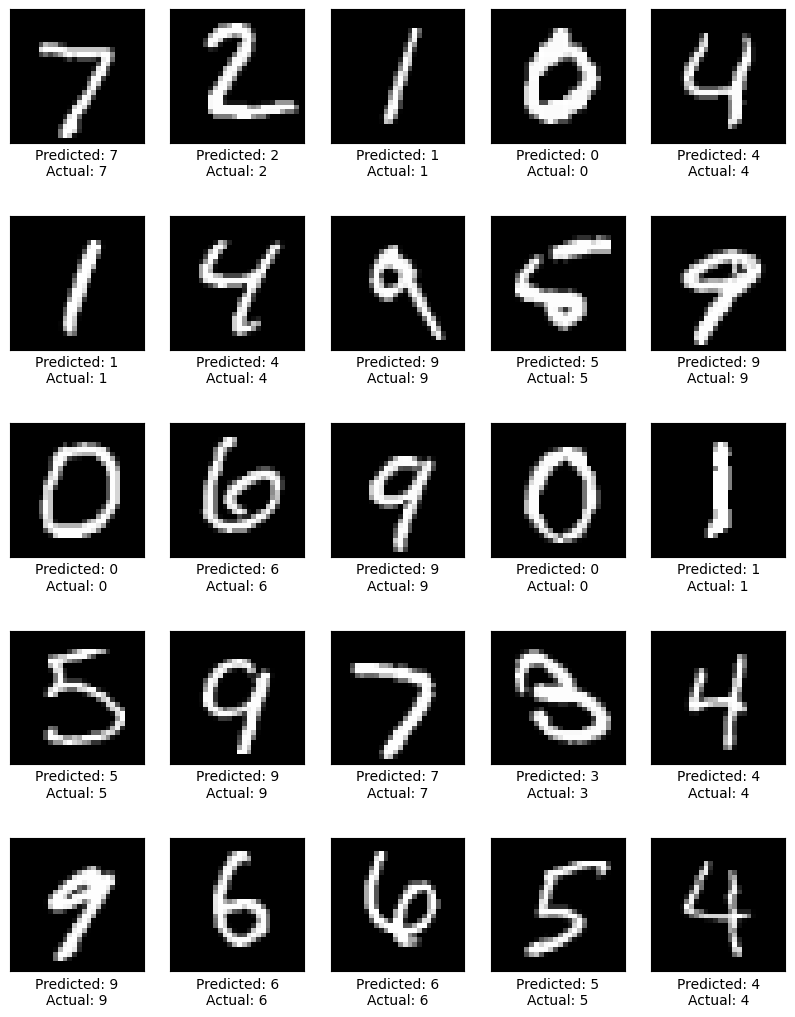

In [ ]:
predictions = model.predict(test_image)
plt.figure(figsize=(10, 13))
for i in range(25):
    plt.subplot(5, 5, i+1)
    plt.imshow(test_image[i].reshape(28, 28), cmap='gray')
    plt.xlabel("Predicted: " + str(np.argmax(predictions[i])) + "\nActual: " + str(np.argmax(test_label[i])))
    plt.xticks([])
    plt.yticks([])
plt.show()